<img src='./img/joint_school_banner_2.png' alt='Joint training school - atmosphere' align='center' width='100%'></img>

<br>

# Dust monitoring with satellite data - Godzilla dust storm in June 2020

### About

Saharan dust plumes are a natural phenomenon and occur especially during the summertime, due to dust uplift from low level jets and haboobs. However, in 2020, the plume was so massive that it was nicknamed "Godzilla". A record-setting dust storm stretched from the Sahara Desert to the Caribbean in summer 2020. It was the most intense dust plume occuring during the past 20 years scientists have records on these events. It contained between 60% and 70% more dust than a typical plume.

The dust plume was carried about 5,000 miles (8,000 kilometers) and even reached the Caribbean Islands and southeastern United States.

On its journey across the Atlantic, Saharan dust sprinkles into the ocean, feeding the marine life, and similarly plant life once it makes landfall. Minerals like iron and phosphorus in the dust act as a fertilizer for the Amazon rainforest, Earth’s largest and most biodiverse tropical forest, whose rains otherwise wash many of these valuable nutrients into the Amazon river basin.

Tracking and understanding dust plumes and their effects is critical, since dust intrusion also affects air quality. The “Godzilla” dust plume degraded the air quality in the Carribean Basin to the hazardous level and the dust intrusion into the U.S. exceeded the EPA air quality in about 40% of the stations in Southern U.S. Breathing in dust is particularly hazardous for children, the elderly, and those with respiratory conditions like asthma.







<img src='./img/godzilla.png' alt='Godzilla dust storm' align='center' width='50%'></img>

<i>MSG L1 natural color RGB composite on 17 June 2020 </i>

### How to access the data

This notebook highlights the following Satellite-based data products that can be used for dust monitoring:
* `Metop-A/B/C GOME-2 Level 3 Absorbing Aerosol Index`
* `Copernicus Sentinel-5P TROPOMI Level 2 UV Absorbing Index`

#### Metop-A/B/C GOME-2 Level 3 AAI data

AAI Level 3 data are available for download via [TEMIS](http://www.temis.nl/airpollution/absaai/), a web-based service for atmospheric satellite data products maintained by KNMI. TEMIS provides daily and monthly aggregated Level 3 (gridded) data products for the three satellites Metop-A, -B, and -C. Go to the [download page](https://www.temis.nl/airpollution/absaai/#GOME2_AAI).

#### Copernicus Sentinel-5P TROPOMI Level 2 UV AI data

Sentinel-5P Pre-Ops data are disseminated in the `netCDF` format and can be downloaded via the [Sentinel-5P Pre-Operations Data Hub](https://s5phub.copernicus.eu/dhus/#/home). You can login with the following credentials:
* **Username**: `s5pguest`
* **Password**: `s5pguest`

### Module outline
* [1 - Metop-B/C GOME-2 Level 3 AAI data](#dust_aai)
  * [1.1 - Load time-series of daily Metop-B/C GOME-2 Level 3 AAI data as xarray.DataArray](#load_aai)
  * [1.2 - Concatenate the data from the two satellites Metop-B and -C](#concat_aai)
  * [1.3 - Combine AAI data from the two satellites Metop-B and -C onto one single grid](#combine_aai)
  * [1.4 - Retrieve time coordinate information and assign time coordinates to the time dimension](#time_aai)
  * [1.5 - Visualize a global map of Absorbing Aerosol Index data for one time step](#visualize_aai)
  * [1.6 - Animate daily Metop-B/C GOME-2 Level 3 Absorbing Aerosol Index (AAI) data between 9 to 17 June 2020](#animate_aai)
* [2 - Copernicus Sentinel-5P TROPOMI UVAI data](#dust_s5p)
  * [2.1 - Load and browse 'Sentinel-5P TROPOMI Aerosol Index Level 2 data](#load_browse_s5p)
  * [2.2 - Retrieve the variable 'Aerosol index from 354 and 388 nm' as xarray.DataArray](#data_retrieve_s5p)
  * [2.3 - Create a geographical subset for Europe](#subset_s5p)
  * [2.4 - Visualize Sentinel-5P TROPOMI Level 2 UVAI data over the Atlantic on 19 June 2020](#visualize_s5p)

<hr>

#### Load required libraries

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd
from datetime import datetime

from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = UserWarning)

#### Load helper functions

In [2]:
%run ./functions.ipynb

<hr>

## 1. Metop-B/C GOME-2 Level 3 Absorbing Aerosol Index

### 1.1 Load time-series of daily Metop-B/C GOME-2 Level 3 AAI data as xarray.DataArray

The data is disseminated in `netCDF` as daily files per satellite and have bin uploaded to the folder `/data/dust/aai/`. The first step is to load all files of the satellite Metop-B as a xarray.Dataset object. The xarray function `open_mfdataset()` allows you to load multiple netCDF files at once. You have to specify the dimension the indiviual files have to be concatenated on. In our case, we would like to concatenate the files on the dimension `time`.

In [3]:
file = './data/dust/aai/ESACCI-AEROSOL-L3-AAI-GOME2B*'
aai_gome2b = xr.open_mfdataset(file, concat_dim='time', combine='nested')
aai_gome2b

<xarray.Dataset>
Dimensions:                  (longitude: 360, latitude: 180, time: 17)
Coordinates:
  * longitude                (longitude) float32 -179.5 -178.5 ... 178.5 179.5
  * latitude                 (latitude) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Dimensions without coordinates: time
Data variables:
    absorbing_aerosol_index  (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    number_of_observations   (time, latitude, longitude) int16 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    solar_zenith_angle       (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes: (12/32)
    Conventions:                CF-1.6
    title:                      ESA CCI absorbing aerosol index level 3 product
    description:                Multi-Sensor AAI field for 09-06-2020
    institution:                Royal Netherlands Meteorological Institute (K...
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-aerosol-cci.org
    ...                         ...
    geospatial_lon_resolution:  1.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    comment:                    Sun glint and solar eclipse events were filte...
    license:                    ESA CCI Data Policy: free and open access
    summary:                    This dataset contains absorbing aerosol index...

The output of the xarray `Dataset` above shows that the data files contain three variables: <br>
* `absorbing_aerosol_index`,
* `number_of_observations`, and
* `solar_zenith_angle`. 

The variable of interest is `absorbing aerosol_index`. By adding the variable of interest into square brackets `[]`, you can select the variable's `DataArray`. You can see that the daily gridded data are on a 1 deg x 1 deg data grid, with 180 latitude values and 360 longitude values.

In [4]:
aai_b = aai_gome2b['absorbing_aerosol_index']
aai_b


<xarray.DataArray 'absorbing_aerosol_index' (time: 17, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(17, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

Let us repeat the above steps for the data files from the Metop-C satellite.

In [5]:
file = './data/dust/aai/ESACCI-AEROSOL-L3-AAI-GOME2C*'
aai_gome2c = xr.open_mfdataset(file, concat_dim='time', combine='nested')

aai_c = aai_gome2c['absorbing_aerosol_index']
aai_c

<xarray.DataArray 'absorbing_aerosol_index' (time: 17, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(17, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

### <a id='concat_aai'></a>1.2 Concatenate the data from the two satellites Metop-B and -C

The overall goal is to bring the AAI data from the two satellites together. Thus, the next step is to concatenate the `DataArrays` from the two satellites Metop-B and -C and create a new dimension with the name `satellite`. 
You can use the xarray function `concat()` to concatenate multiple data arrays.

The result is a four-dimensional `DataArray`, with the dimensions `satellite`, `time`, `latitude` and `longitude`. You can see that the resulting `DataArray` holds coordinate information for the two spatial dimensions `longitude` and `latitude`, but not for `satellite` and `time`.

In [6]:
aai_concat = xr.concat([aai_b, aai_c], dim='satellite')
aai_concat

,Array,Chunk
Bytes,8.40 MiB,253.12 kiB
Shape,"(2, 17, 180, 360)","(1, 1, 180, 360)"
Count,204 Tasks,34 Chunks
Type,float32,numpy.ndarray


<br>

### <a id='combine_aai'></a>1.3 Combine AAI data from the two satellites Metop-B and -C onto one single grid

Since the final aim is to combine the data from the two satellites Metop-B and -C onto one single grid, the next step is to reduce the `satellite` dimension. You can do this by applying the reducer function `mean()` to the `aai_concat` data array. The dimension (`dim`) to be reduced shall be the `satellite` dimension.

This function builds the average of all data points within a grid cell. The resulting `DataArray` has three dimensions: `time`, `latitude` and `longitude`.

In [7]:
aai_combined = aai_concat.mean(dim='satellite')
aai_combined

<xarray.DataArray 'absorbing_aerosol_index' (time: 17, latitude: 180, longitude: 360)>
dask.array<mean_agg-aggregate, shape=(17, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: time

### <a id='time_aai'></a>1.4 Retrieve time coordinate information and assign time coordinates to the time dimension

By inspecting the metadata of the single data file `aai_gome2b` we loaded at the beginning, you can see that the only metadata attribute that contains the valid time step is the `description` attribute.

Hence, the first step is to retrieve the metadata attribute `description` and to split the resulting string object at the positions with a space. The day string is the fourth position of the resulting string.

The `description` attribute can be accessed directly from the `aai_gome2b` dataset object.

In [8]:
start_day = aai_gome2b.description.split()[4]
start_day

'09-06-2020'

With the help of the Python library `pandas`, you can build a `DateTime` time series for the 17 time steps, starting from the `start_day` variable that was defined above.

You can use the `date_range` function from pandas, using the length of the time dimension of the `aai_ccombined` data array and `'d'` (for day) as freqency argument.

The result is a time-series with `DateTime` information from 9 to 25 June 2020.

In [9]:
time_coords = pd.date_range(datetime.strptime(start_day,'%d-%m-%Y'), periods=len(aai_combined.time), freq='d').strftime("%Y-%m-%d").astype('datetime64[ns]')
time_coords

DatetimeIndex(['2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25'],
              dtype='datetime64[ns]', freq=None)

<br>

The final step is to assign the pandas time series object `time_coords` to the `aai_combined` data array object. You can use the `assign_coords()` function from xarray.

The result is that the time dimension has now assigned coordinate information.

In [10]:
aai_combined = aai_combined.assign_coords(time=time_coords)
aai_combined

<xarray.DataArray 'absorbing_aerosol_index' (time: 17, latitude: 180, longitude: 360)>
dask.array<mean_agg-aggregate, shape=(17, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) datetime64[ns] 2020-06-09 2020-06-10 ... 2020-06-25

<br>

In [11]:
str(aai_combined.time[9].dt.strftime('%Y-%m-%d').data)

'2020-06-18'

### <a id='visualize_aai'></a>1.5 Visualize a global map of Absorbing Aerosol Index data for one time step

The next step is to visualize the Absorbing Aerosol Index data for one time step. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) for it.

You can use `afmhot_r` as color map, `ccrs.PlateCarree()` as projection and by applying `dt.strftime('%Y-%m-%d').data` to the time coordinate variable, you can add the valid time step to the title of the plot.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Absorbing aerosol index averaged for each grid cell - 2020-06-18'}>)

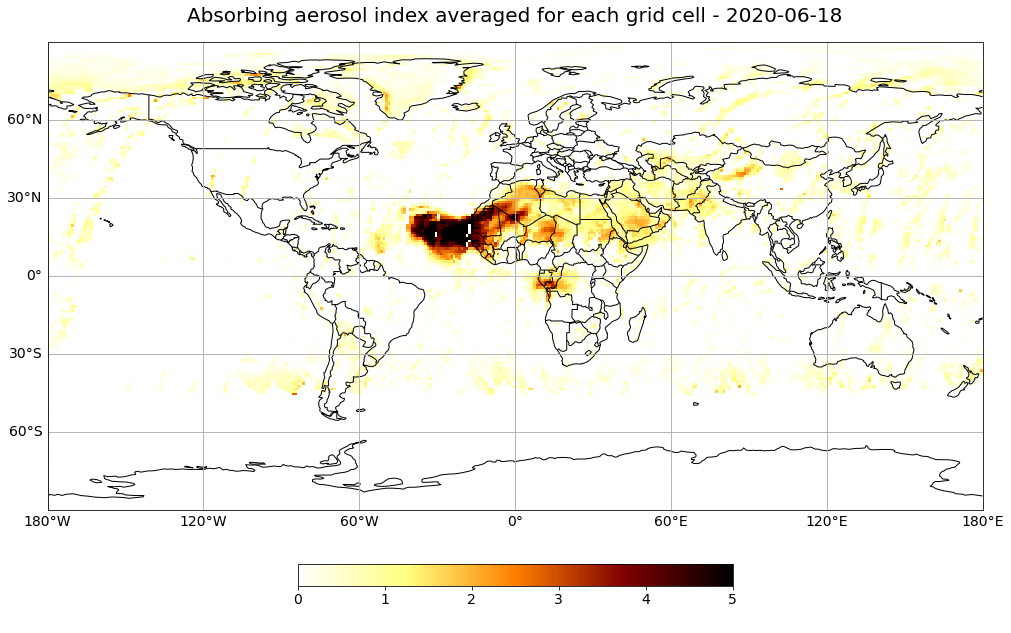

In [12]:
day = 9
visualize_pcolormesh(data_array = aai_combined[day,:,:],
                     longitude = aai_combined.longitude, 
                     latitude = aai_combined.latitude,
                     projection = ccrs.PlateCarree(), 
                     color_scale = 'afmhot_r', 
                     unit = ' ',
                     long_name = aai_b.long_name + ' - ' + aai_combined.time[day].dt.strftime('%Y-%m-%d').data, 
                     vmin = 0, 
                     vmax = 5)


### <a id='animate_aai'></a>1.6 Animate daily Metop-B/C GOME-2 Level 3 Absorbing Aerosol Index (AAI) data between 9 to 17 June 2020

The final step is now to animate the `aai_combined` DataArray over the 17 days to see the dispersion of Aerosols resulting from the Saharan dust event over the Atlantic in June 2020.

The animation function consists of four parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [13]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=aai_combined[0,:,:],
                               longitude=aai_combined.longitude, 
                               latitude=aai_combined.latitude,
                               projection=ccrs.PlateCarree(), 
                               color_scale='afmhot_r', 
                               unit=' ',
                               long_name=aai_b.long_name + '/' + str(aai_combined.time[0].dt.strftime('%Y-%m-%d').data), 
                               vmin=0, 
                               vmax=6)


frames = 16


def draw(i):
    img = plt.pcolormesh(aai_combined.longitude, 
                         aai_combined.latitude, 
                         aai_combined[i,:,:], 
                         cmap='afmhot_r', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=6)
    ax.set_title(aai_b.long_name + ' ' + str(aai_combined.time[i].dt.strftime('%Y-%m-%d').data),
                fontsize=20, pad=20.0)
    return img


def init():
    return fig


def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=500, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)


#### Play the animation as HTML5 video

In [14]:
HTML(ani.to_html5_video())

<br>

## <a id='dust_s5p'></a> 2. Copernicus Sentinel-5P TROPOMI Level 2 Ultraviolet Aerosol Index

### <a id='load_browse_s5p'></a>2.1 Load and browse Sentinel-5P TROPOMI Aerosol Index Level 2 data

A Sentinel-5P TROPOMI Aerosol Index Level 2 file is organised in two groups: `PRODUCT` and `METADATA`. The `PRODUCT` group stores the main data fields of the product, including `latitude`, `longitude` and the variable itself. The `METADATA` group provides additional metadata items.

Sentinel-5P TROPOMI variables have the following dimensions:
* `scanline`: the number of measurements in the granule / along-track dimension index
* `ground_pixel`: the number of spectra in a measurement / across-track dimension index
* `time`: time reference for the data
* `corner`: pixel corner index

Sentinel-5P TROPOMI data is disseminated in `netCDF`. You can load multiple `netCDF` files with the `open_mfdataset()` function of the xarray library. In order to load the variable as part of a Sentinel-5P data files, you have to specify the following keyword arguments: 
- `group='PRODUCT'`: to load the `PRODUCT` group
- `concat_dim='scanline'`: `scanline` is the dimension the files shall be concatenated on
- `combine='nested'`: to create one grid out of n-dimensional grids 

Let us load the three Sentinel-5P TROPOMI data files stored under `./data/s5p_uvai/` as `xarray.Dataset` and inspect the data structure:

In [15]:
file = xr.open_mfdataset('./data/dust/s5p_uvai/*.nc', concat_dim='scanline', combine='nested',  group='PRODUCT')
file

<xarray.Dataset>
Dimensions:                          (scanline: 12519, ground_pixel: 450, time: 1, corner: 4)
Coordinates:
  * scanline                         (scanline) float64 0.0 1.0 ... 4.173e+03
  * ground_pixel                     (ground_pixel) float64 0.0 1.0 ... 449.0
  * time                             (time) datetime64[ns] 2020-06-19
  * corner                           (corner) float64 0.0 1.0 2.0 3.0
    latitude                         (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    longitude                        (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
Data variables:
    delta_time                       (time, scanline) datetime64[ns] dask.array<chunksize=(1, 4172), meta=np.ndarray>
    time_utc                         (time, scanline) object dask.array<chunksize=(1, 4172), meta=np.ndarray>
    qa_value                         (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    aerosol_index_354_388            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    aerosol_index_340_380            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    aerosol_index_354_388_precision  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    aerosol_index_340_380_precision  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>

You see that the loaded data object consists of four dimensions and seven data variables:
* **Dimensions**:
  * `scanline` 
  * `ground_pixel`
  * `time`
  * `corner`


* **Data variables**:
  * `delta_time`: the offset of individual measurements within the granule, given in milliseconds
  * `time_utc`: valid time stamp of the data
  * `qa_value`: quality descriptor, varying between 0 (nodata) and 1 (full quality data).
  * `aerosol_index_354_388`: Aerosol index from 354 and 388 nm
  * `aerosol_index_340_380`: Aerosol index from 340 and 380 nm
  * `aerosol_index_354_388_precision`: Precision of aerosol index from 354 and 388 nm
  * `aerosol_index_340_380_precision`: Precision of aerosol index from 340 and 380 nm

### <a id='data_retrieve_s5p'></a>2.2 Retrieve the variable Aerosol index from 354 and 388 nm as xarray.DataArray

You can specify one variable of interest by putting the name of the variable into square brackets `[]` and get more detailed information about the variable. E.g. `aerosol_index_354_388` is the 'Aerosol index from 354 and 388 nm' and has three dimensions, `time`, `scanline` and `ground_pixel` respectively.

In [16]:
ai = file['aerosol_index_354_388']
ai

<xarray.DataArray 'aerosol_index_354_388' (time: 1, scanline: 12519, ground_pixel: 450)>
dask.array<concatenate, shape=(1, 12519, 450), dtype=float32, chunksize=(1, 4174, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.172e+03 4.173e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2020-06-19
    latitude      (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    longitude     (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 388 and 354 nm
    long_name:               Aerosol index from 388 and 354 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

You can retrieve the array values of the variable with squared brackets: `[:,:,:]`. One single time step can be selected by specifying one value of the time dimension, e.g. `[0,:,:]`.

In [17]:
ai_1906 = ai[0,:,:]
ai_1906

<xarray.DataArray 'aerosol_index_354_388' (scanline: 12519, ground_pixel: 450)>
dask.array<getitem, shape=(12519, 450), dtype=float32, chunksize=(4174, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.172e+03 4.173e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2020-06-19
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(4172, 450), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(4172, 450), meta=np.ndarray>
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 388 and 354 nm
    long_name:               Aerosol index from 388 and 354 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

Additionally, you can save the attributes `units` and `longname`, which you can make use of when visualizing the data.

In [18]:
longname = ai_1906.long_name
units = ai_1906.units

longname, units

('Aerosol index from 388 and 354 nm', '1')

### <a id='subset_s5p'></a>2.3 Create a geographical subset for Western Africa and the Atlantic

Let us create a geographical subset for a region covering Western Africa and the Atlantic, in order to better analyse the Godzilla dust event which occured in June 2020 over the Atlantic.

For geographical subsetting, you can use the function [generate_geographical_subset](./functions.ipynb#generate_geographical_subset). You can use `?generate_geographical_subset` to open the docstring in order to see the function's keyword arguments.

In [ ]:
?generate_geographical_subset

Define the bounding box information for a region covering Western Africa and the Atlantic:

In [20]:
latmin = 0.
latmax = 40.
lonmin = -80.
lonmax = 0

Now, let us apply the function [generate_geographical_subset](./functions.ipynb#generate_geographcial_subset) to subset the `ai_1906` data array. Let us call the new `xarray.DataArray` `ai_1906_subset`.

In [21]:
ai_1906_subset = generate_geographical_subset(xarray=ai_1906, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)
ai_1906_subset

<xarray.DataArray 'aerosol_index_354_388' (scanline: 2822, ground_pixel: 450)>
dask.array<where, shape=(2822, 450), dtype=float32, chunksize=(955, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 1.512e+03 1.513e+03 ... 2.423e+03 2.424e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2020-06-19
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(943, 450), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(943, 450), meta=np.ndarray>
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 388 and 354 nm
    long_name:               Aerosol index from 388 and 354 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

<br>

### <a id='visualize_s5p'></a>2.4 Visualize Sentinel-5P TROPOMI Level 2 UVAI data over the Atlantic on 19 June 2020

Let us now visualize the subsetted `xarray.DataArray` with the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh). You have to set the keyword argument `set_global` to `False`. As maximum and minimum latitude and longitude bounds, you can use the specified bounding box above.

Additionally, in order to have the time information as part of the title, we add the string of the datetime information to the `longname` variable: `longname + ' ' + str(ai_1906_subset.time.data)`.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Aerosol index from 388 and 354 nm 2020-06-19'}>)

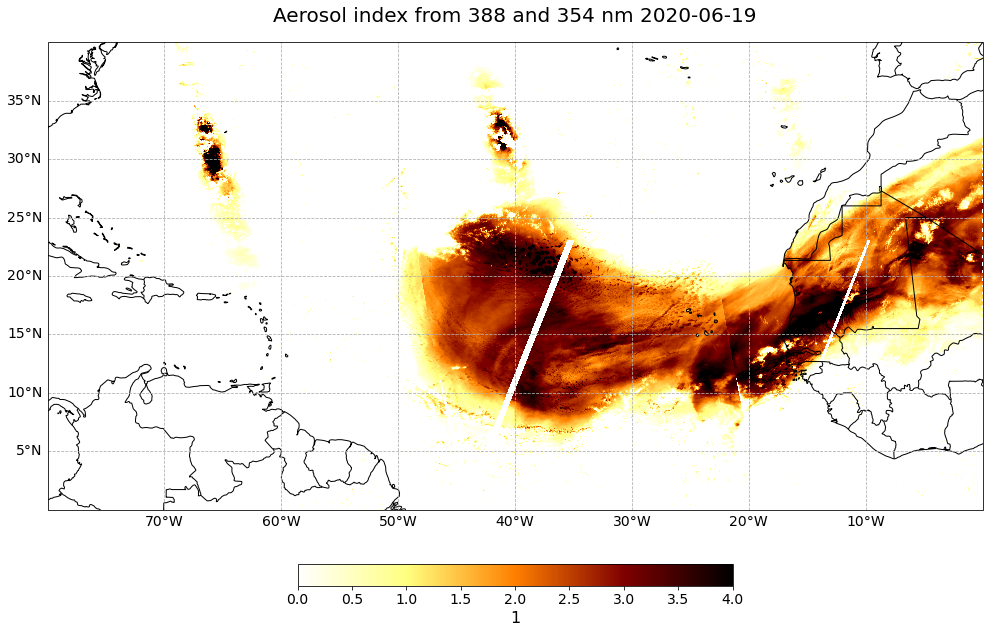

In [22]:
visualize_pcolormesh(data_array=ai_1906_subset,
                     longitude=ai_1906_subset.longitude,
                     latitude=ai_1906_subset.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='afmhot_r',
                     unit=units,
                     long_name=longname + ' ' + str(ai_1906_subset.time.dt.strftime('%Y-%m-%d').data),
                     vmin=0, 
                     vmax=4,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

<br>

<hr>

<img src='./img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>
<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.